# MATH 189 Final Project

---
*source code*

---
by Vrisan Dubey, Sawyer Figueroa, and Victor Derycz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

sns.set_theme()

C:\Users\User\AppData\Local\Temp\ipykernel_16492\2015104283.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Reading in Data

In [2]:
# filepaths set to current directory
walmart = pd.read_csv('walmart.csv')
amazon = pd.read_csv('amazon.csv')

In [3]:
print(walmart.shape)
walmart.head()

(30000, 14)


,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,NaN,139941530,NaN,"Food | Meal Solutions, Grains & Pasta | Canned...",NaN,True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,569045548.0,632775553,NaN,Health | Equate | Equate Allergy | Equate Sinu...,NaN,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,568068849.0,281487005,NaN,Electronics | Smart Home | Smart Energy and Li...,NaN,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,NaN,133714060,NaN,Sports & Outdoors | Bikes | Bike Accessories |...,NaN,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,NaN,104042139,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...,NaN,True


In [4]:
print(amazon.shape)
amazon.head()

(10002, 28)


,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [5]:
print(f'Walmart Cols: {list(walmart.columns)}')
print()
print(f'Amazon Cols: {list(amazon.columns)}')

Walmart Cols: ['Uniq Id', 'Crawl Timestamp', 'Product Url', 'Product Name', 'Description', 'List Price', 'Sale Price', 'Brand', 'Item Number', 'Gtin', 'Package Size', 'Category', 'Postal Code', 'Available']

Amazon Cols: ['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']


## EDA

In [6]:
#find the proportion of each column that is null
walmart.isna().mean(axis=0)

Uniq Id            0.000000
Crawl Timestamp    0.000000
Product Url        0.000000
Product Name       0.000000
Description        0.001767
List Price         0.000000
Sale Price         0.000000
Brand              0.018800
Item Number        0.704167
Gtin               0.000000
Package Size       1.000000
Category           0.000567
Postal Code        1.000000
Available          0.000000
dtype: float64

In [7]:
amazon.isna().mean(axis=0)

Uniq Id                  0.000000
Product Name             0.000000
Brand Name               1.000000
Asin                     1.000000
Category                 0.082983
Upc Ean Code             0.996601
List Price               1.000000
Selling Price            0.010698
Quantity                 1.000000
Model Number             0.177165
About Product            0.027295
Product Specification    0.163167
Technical Details        0.078984
Shipping Weight          0.113777
Product Dimensions       0.952110
Image                    0.000000
Variants                 0.752250
Sku                      1.000000
Product Url              0.000000
Stock                    1.000000
Product Details          1.000000
Dimensions               1.000000
Color                    1.000000
Ingredients              1.000000
Direction To Use         1.000000
Is Amazon Seller         0.000000
Size Quantity Variant    1.000000
Product Description      1.000000
dtype: float64

In [8]:
#Keep only the columns that we are concerned with
walmart = walmart[['Product Name', 'Sale Price', 'Brand', 'Category']]
amazon = amazon[['Product Name', 'Brand Name', 'Category', 'Selling Price']]

walmart.iloc[1:6]

,Product Name,Sale Price,Brand,Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...
5,(6 Boxes) Twinings of London Nightly Calm Gree...,17.99,Twinings,Food | Beverages | Tea | All Tea


In [9]:
amazon.head()

,Product Name,Brand Name,Category,Selling Price
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,Sports & Outdoors | Outdoor Recreation | Skate...,$237.68
1,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,Toys & Games | Learning & Education | Science ...,$99.95
2,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,Toys & Games | Arts & Crafts | Craft Kits,$34.99
3,Guillow Airplane Design Studio with Travel Cas...,NaN,Toys & Games | Hobbies | Models & Model Kits |...,$28.91
4,Woodstock- Collage 500 pc Puzzle,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,$17.49


In [10]:
#extracting the first category from the 'Category' column

extract_primary_category = lambda s: s.split(' | ')[0] if not pd.isna(s) else np.nan
walmart['Primary Category'] = walmart['Category'].apply(extract_primary_category)
amazon['Primary Category'] = amazon['Category'].apply(extract_primary_category)

In [11]:
walmart['Primary Category']

0                     Food
1                   Health
2              Electronics
3        Sports & Outdoors
4                     Baby
               ...        
29995                 Food
29996    Sports & Outdoors
29997                 Food
29998               Beauty
29999               Beauty
Name: Primary Category, Length: 30000, dtype: object

In [12]:
amazon['Primary Category']

0        Sports & Outdoors
1             Toys & Games
2             Toys & Games
3             Toys & Games
4             Toys & Games
               ...        
9997          Toys & Games
9998          Toys & Games
9999       Office Products
10000         Toys & Games
10001       Home & Kitchen
Name: Primary Category, Length: 10002, dtype: object

In [13]:
#no need for original Category column anymore with the Primary Column

walmart = walmart.drop(columns=['Category'])
amazon = amazon.drop(columns=['Category'])

In [14]:
walmart.isna().mean(axis=0)

Product Name        0.000000
Sale Price          0.000000
Brand               0.018800
Primary Category    0.000567
dtype: float64

In [15]:
amazon.isna().mean(axis=0)

Product Name        0.000000
Brand Name          1.000000
Selling Price       0.010698
Primary Category    0.082983
dtype: float64

In [16]:
#since amazon dataset does not have any brand names, we drop the variable for both datasets

walmart = walmart.drop(columns=['Brand'])
amazon = amazon.drop(columns=['Brand Name'])

#### Null Category Analysis

In [17]:
walmart[walmart['Primary Category'].isna()]

,Product Name,Sale Price,Primary Category
3927,3 Stories Trading Company 6 Pack Boxed Receivi...,26.09,NaN
5868,Speed Racer Boomerangs RH (Blue)Colorado Boome...,16.95,NaN
6443,Mobile Equipment Box,159.99,NaN
9068,Ultra Pro Magic: The Gathering Battebond Playmat,10.98,NaN
10449,Blood is Thicker than water- Family Runion you...,14.99,NaN
10671,adidas Kids Nemeziz 19.3 Indoor Soccer Shoes |...,60.00,NaN
13435,"HERCHR Toy Bell Holder, Baby Crib Mobile Bed B...",26.74,NaN
14749,Bike Helmet Foldable Cycling Helmet Adult Road...,36.12,NaN
15946,"Butterfinger Bites Chocolate Candy, 3.5oz Thea...",5.28,NaN
16538,Hawaii Lavender Hand Cleansing Sanitizer from ...,9.99,NaN


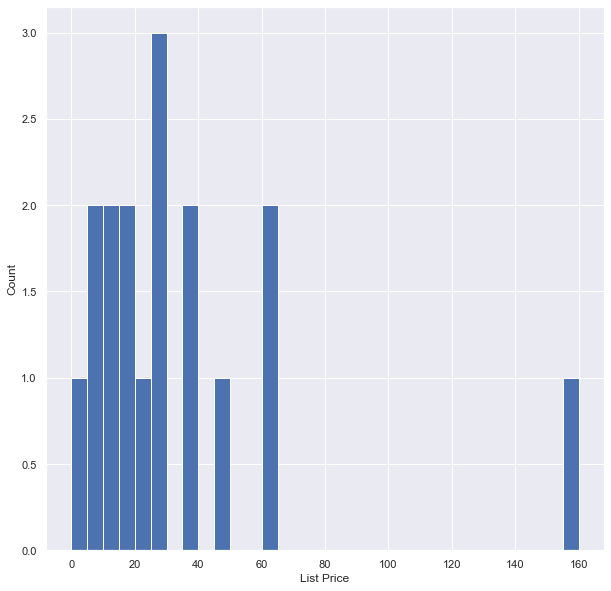

In [18]:
#plot distribution of prices for null category products (Walmart)

plt.figure(figsize=(10, 10))
plt.hist(walmart[walmart['Primary Category'].isna()]['Sale Price'], bins=np.arange(0, 165, 5))
plt.xlabel('List Price')
plt.ylabel('Count')
plt.show()

In [19]:
amazon.isna().mean(axis=0)

Product Name        0.000000
Selling Price       0.010698
Primary Category    0.082983
dtype: float64

In [20]:
#function to clean up price column in Amazon dataset (from string -> float)

def extract_price(s):
    if pd.isna(s):
        return np.nan
    
    s = s.replace('$', '').replace(',', '')
    if ' - ' in s:
        s1, s2 = s.split(' - ')
        s = (float(s1) + float(s2)) / 2
        return s
    try:
        return float(s)
    except:
        return np.nan

In [21]:
walmart.iloc[1:6]

,Product Name,Sale Price,Primary Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Health
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,Electronics
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Baby
5,(6 Boxes) Twinings of London Nightly Calm Gree...,17.99,Food


In [22]:
amazon['Selling Price'] = amazon['Selling Price'].apply(extract_price)
amazon.head()

,Product Name,Selling Price,Primary Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Sports & Outdoors
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Toys & Games
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Toys & Games
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Toys & Games
4,Woodstock- Collage 500 pc Puzzle,17.49,Toys & Games


In [23]:
amazon['Selling Price'].isna().mean()

0.026294741051789642

In [24]:
#drop the products with null prices

amazon = amazon.drop(amazon[amazon['Selling Price'].isna()].index)
amazon.shape

(9739, 3)

In [25]:
amazon[amazon['Primary Category'].isna()]

,Product Name,Selling Price,Primary Category
5,"Terra by Battat – 4 Dinosaur Toys, Medium – Di...",18.66,NaN
9,Pokemon TCG: Sun and Moon Crimson Invasion Eli...,38.49,NaN
40,Funko Pop! Games: Persona 5 - The Joker (Style...,15.45,NaN
50,"LAMO 5"" Vinyl Figure - Legacy Gamers Dr Disres...",19.50,NaN
56,"Wild Republic Mermaid Toy, Slap Bracelet, Gift...",7.99,NaN
...,...,...,...
9876,"NPW Drinking Buddies Money Shooter, It's Raini...",14.82,NaN
9877,Banpresto 39655 My Hero Academia Age of Heroes...,34.99,NaN
9884,Li'l Woodzeez Bakery Playset – Tickle-Your-Tas...,33.39,NaN
9936,"Fisher-Price Nickelodeon Sunny Day, Sunny Styl...",34.06,NaN


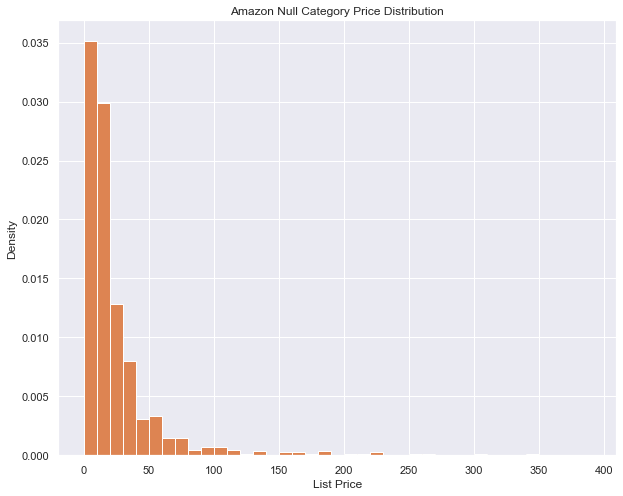

In [26]:
#plot distribution of prices for null category products (Amazon)

plt.figure(figsize=(10, 8))
plt.hist(amazon[amazon['Primary Category'].isna()]['Selling Price'], bins=np.arange(0, 400, 10), density=True, color=sns.color_palette()[1])
plt.xlabel('List Price')
plt.ylabel('Density')
plt.title('Amazon Null Category Price Distribution')
plt.savefig('amazon_na.png')
plt.show()

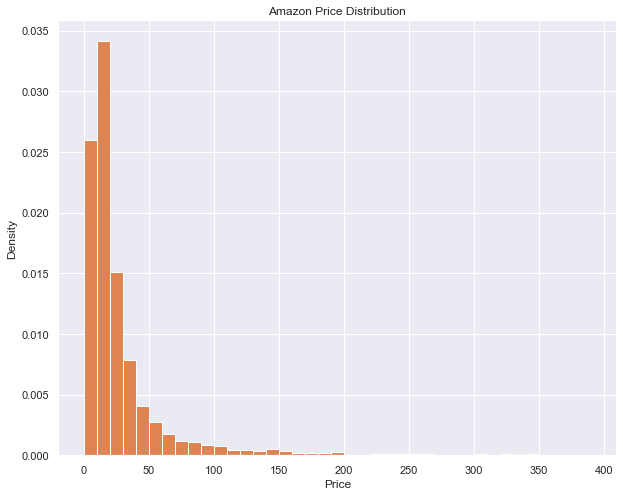

In [27]:
#plot the distribution of prices for ALL amazon products

plt.figure(figsize=(10, 8))
plt.hist(amazon['Selling Price'], bins=np.arange(0, 400, 10), alpha=1, density=True, label='Amazon', color=sns.color_palette()[1])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Amazon Price Distribution')
plt.savefig('amazon_dist.png')
plt.show()

#### Distribution Analysis

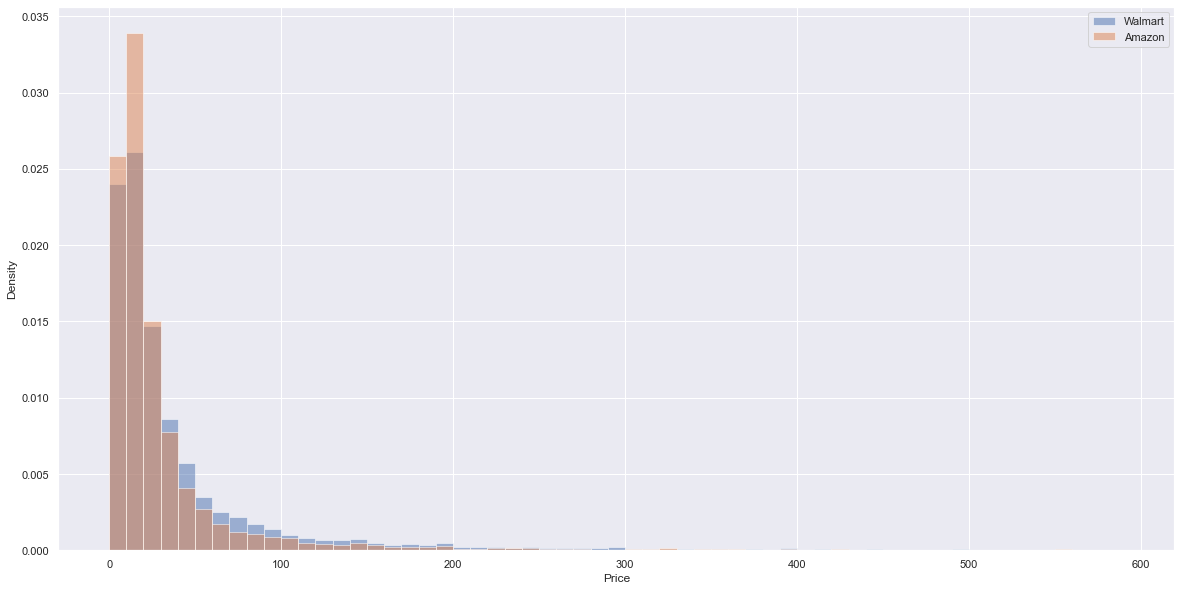

In [28]:
#plot the distribution of prices for both stores

plt.figure(figsize=(20, 10))
plt.hist(walmart['Sale Price'], bins=np.arange(0, 600, 10), alpha=0.5, density=True, label='Walmart')
plt.hist(amazon['Selling Price'], bins=np.arange(0, 600, 10), alpha=0.5, density=True, label='Amazon')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.savefig('hist.png')
plt.show()

In [29]:
#function to generate the empirical cdfs of our data

def generate_cdf(walmart_ser, amazon_ser, zoom=False, path=None):
    max_val = max(int(walmart_ser.max()), int(amazon_ser.max()))
    cdf_vals_wal = []
    cdf_vals_ama = []
    
    for i in np.arange(0, max_val + 1, 0.5):
        #loop through the domain of the values in the series and find the proportion of data less than the current thresho;d
        cdf_vals_wal.append((walmart_ser <= i).mean())
        cdf_vals_ama.append((amazon_ser <= i).mean())
    if zoom:
        fig, axs = plt.subplots(1, 2, figsize=(20, 10))

        axs[0].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_wal, label='Walmart')
        axs[0].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_ama, label='Amazon')
        axs[0].set_xlabel('Prices')
        axs[0].set_ylabel('CDF')
        axs[0].legend()


        axs[1].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_wal, label='Walmart')
        axs[1].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_ama, label='Amazon')
        axs[1].set_xlabel('Prices')
        axs[1].set_ylabel('CDF')
        axs[1].set_xlim(0, 500)
        axs[1].legend()
    else:
        fig, axs = plt.subplots(1, 1, figsize=((10, 8)))
        axs.plot(np.arange(0, max_val + 1, 0.5), cdf_vals_wal, label='Walmart')
        axs.plot(np.arange(0, max_val + 1, 0.5), cdf_vals_ama, label='Amazon')
        axs.set_xlabel('Prices')
        axs.set_ylabel('CDF')
        axs.set_xlim(0, max_val)
        axs.legend()
    
    if path:
        plt.savefig(path)

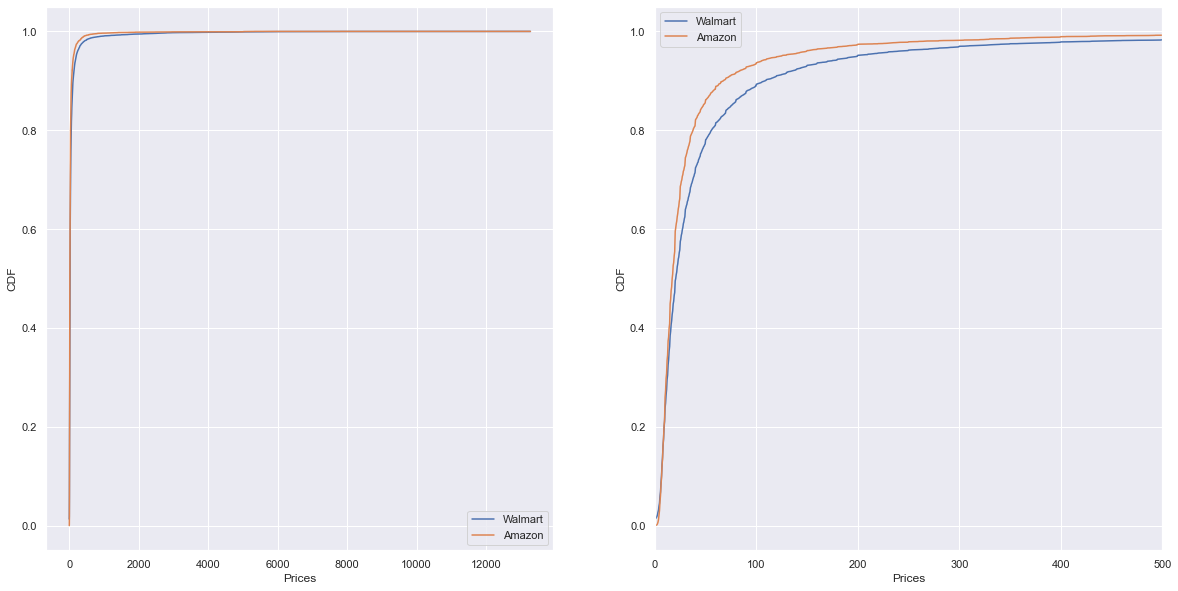

In [30]:
generate_cdf(walmart['Sale Price'], amazon['Selling Price'], path='cdfs.png', zoom=True)

#### Category Analysis

In [31]:
walmart['Primary Category'].value_counts()

Primary Category
Sports & Outdoors          11038
Food                        4140
Health                      3924
Baby                        2754
Personal Care               2313
Household Essentials        1970
Toys                         870
Beauty                       808
Home                         476
Clothing                     446
Premium Beauty               413
Shop by Brand                158
Patio & Garden               120
Home Improvement             110
Auto & Tires                  76
Party & Occasions             75
Pets                          74
Electronics                   56
Seasonal                      44
Industrial & Scientific       30
Feature                       15
Books                         14
Video Games                   12
Jewelry                        8
Arts Crafts & Sewing           8
Walmart for Business           7
Office Supplies                5
Character Shop                 5
Cell Phones                    4
Shop by Movie             

In [32]:
amazon['Primary Category'].value_counts()

Primary Category
Toys & Games                                6509
Home & Kitchen                               683
Clothing, Shoes & Jewelry                    626
Sports & Outdoors                            483
Baby Products                                211
Arts, Crafts & Sewing                        120
Office Products                               75
Hobbies                                       34
Industrial & Scientific                       28
Health & Household                            23
Remote & App Controlled Vehicle Parts         22
Remote & App Controlled Vehicles & Parts      17
Tools & Home Improvement                      16
Pet Supplies                                  14
Patio, Lawn & Garden                          12
Grocery & Gourmet Food                        11
Beauty & Personal Care                        11
Automotive                                     9
Electronics                                    7
Video Games                                    4
Mus

In [33]:
#find which categories are common between datasets to keep

walmart_categories_to_keep = ['Sports & Outdoors', 'Health', 'Household Essentials', 'Home', 'Baby', 'Toys', 'Home Improvement', 'Clothing', 'Jewelry']
amazon_categories_to_keep = ['Toys & Games', 'Home & Kitchen', 'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Baby Products', 'Health & Household']

In [34]:
walmart = walmart[walmart['Primary Category'].isin(walmart_categories_to_keep)]
amazon = amazon[amazon['Primary Category'].isin(amazon_categories_to_keep)]

In [35]:
amazon['Primary Category'].unique()

array(['Sports & Outdoors', 'Toys & Games', 'Clothing, Shoes & Jewelry',
       'Home & Kitchen', 'Baby Products', 'Health & Household'],
      dtype=object)

In [36]:
#functions to create universal categories across datasets

def universalize_walmart(category):
    if category in ['Health', 'Household Essentials', 'Home', 'Home Improvement']:
        return 'Health & Household'
    if category in ['Clothing', "Jewelry"]:
        return 'Clothing, Shoes & Jewelry'
    return category

def universalize_amazon(category):
    if category in ['Home & Kitchen', 'Health & Household']:
        return 'Health & Household'
    if category == 'Baby Products':
        return 'Baby'
    if category == 'Toys & Games':
        return 'Toys'
    return category

walmart['Universal Category'] = walmart['Primary Category'].apply(universalize_walmart)
amazon['Universal Category'] = amazon['Primary Category'].apply(universalize_amazon)

In [37]:
walmart_vcs = walmart['Universal Category'].value_counts(normalize=True)
walmart['Universal Category'].value_counts()

Universal Category
Sports & Outdoors            11038
Health & Household            6480
Baby                          2754
Toys                           870
Clothing, Shoes & Jewelry      454
Name: count, dtype: int64

In [38]:
amazon_vcs = amazon['Universal Category'].value_counts(normalize=True)
amazon['Universal Category'].value_counts()

Universal Category
Toys                         6509
Health & Household            706
Clothing, Shoes & Jewelry     626
Sports & Outdoors             483
Baby                          211
Name: count, dtype: int64

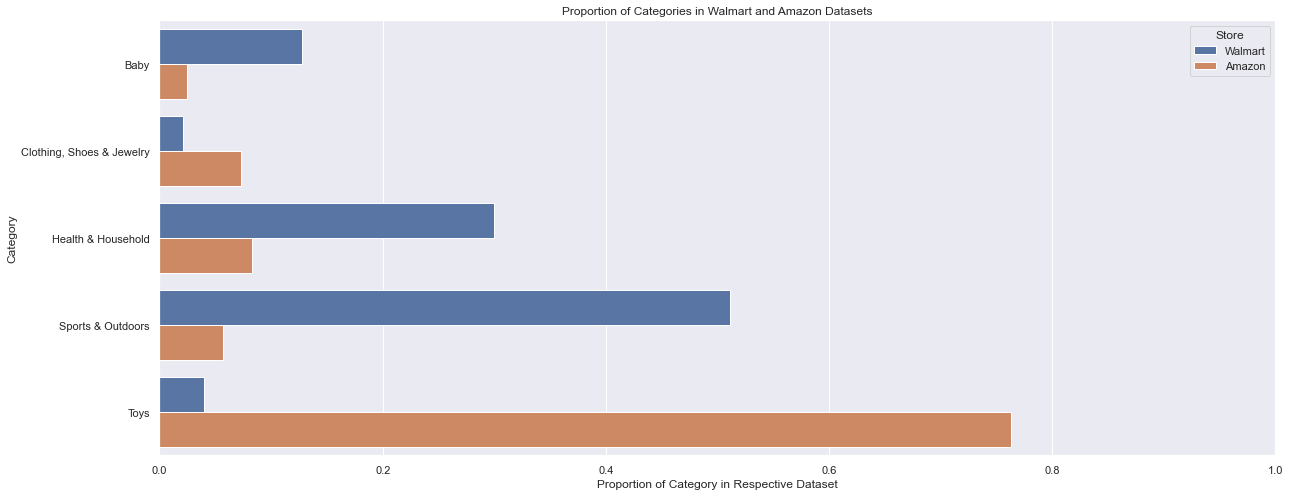

In [39]:
#plot the distribution of the categories for both datasets

plot_df = pd.DataFrame({'Walmart': walmart_vcs, 'Amazon': amazon_vcs})

plot_df = plot_df.reset_index()
plot_df_melted = plot_df.melt(id_vars='Universal Category', var_name='Store', value_name='Count')

plt.figure(figsize=(20, 8))
sns.barplot(data=plot_df_melted, x='Count', y='Universal Category', hue='Store')
plt.title('Proportion of Categories in Walmart and Amazon Datasets')
plt.xlabel('Proportion of Category in Respective Dataset')
plt.ylabel('Category')
plt.xlim(0, 1)
plt.savefig('category_dist.png')
plt.show()

In [40]:
#descriptive stats for the price column

walmart['Sale Price'].describe()

count    21596.000000
mean        87.115107
std        367.840686
min          0.000000
25%         11.960000
50%         23.220000
75%         52.242500
max      13280.810000
Name: Sale Price, dtype: float64

In [41]:
amazon['Selling Price'].describe()

count    8535.000000
mean       44.715483
std       189.450614
min         0.010000
25%        10.205000
50%        17.570000
75%        31.645000
max      5332.000000
Name: Selling Price, dtype: float64

#### Category x Price Interaction

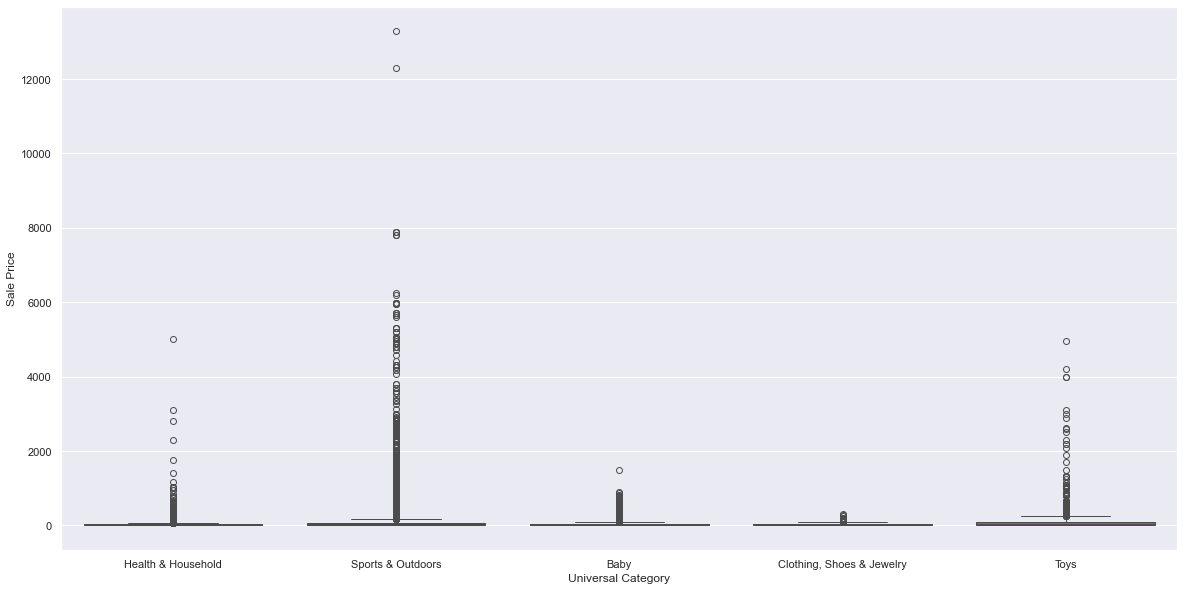

In [42]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=walmart, x='Universal Category', y='Sale Price')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16492\302217629.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart, x='Universal Category', y='Sale Price', ax=axs[0], palette=color_dict)
C:\Users\User\AppData\Local\Temp\ipykernel_16492\302217629.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=amazon, x='Universal Category', y='Selling Price', ax=axs[1], palette=color_dict)


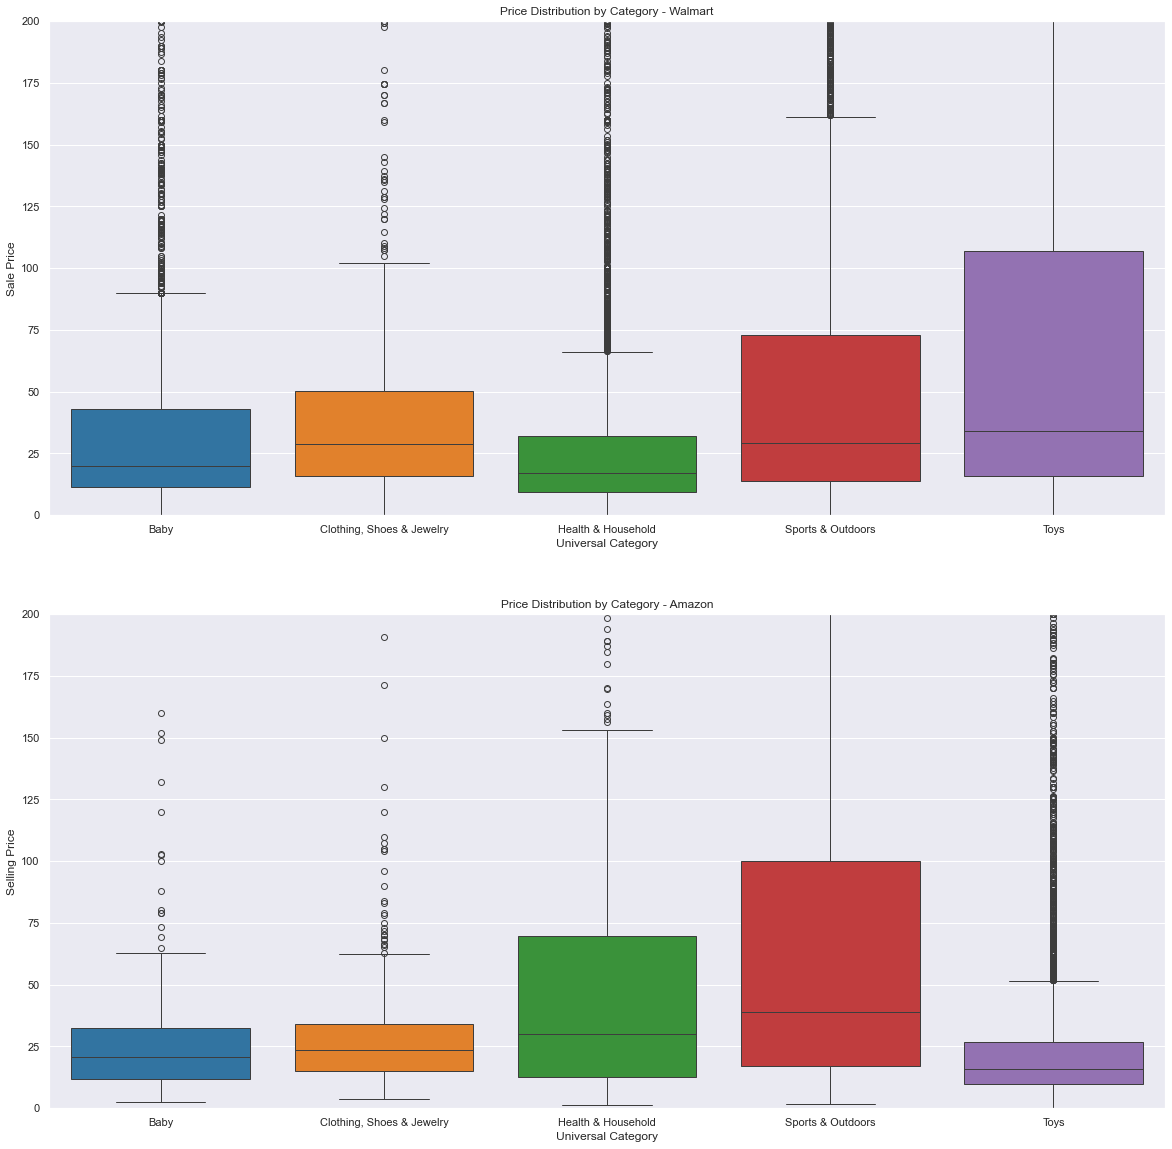

In [43]:
walmart['Universal Category'] = pd.Categorical(walmart['Universal Category'])
amazon['Universal Category'] = pd.Categorical(amazon['Universal Category'])

categories = sorted(walmart['Universal Category'].unique())
walmart['Universal Category'] = walmart['Universal Category'].cat.reorder_categories(categories)
amazon['Universal Category'] = amazon['Universal Category'].cat.reorder_categories(categories)

palette = sns.color_palette("tab10", len(categories))

color_dict = dict(zip(categories, palette))

fig, axs = plt.subplots(2, figsize=(20, 20))

sns.boxplot(data=walmart, x='Universal Category', y='Sale Price', ax=axs[0], palette=color_dict)
axs[0].set_ylim(0, 200)
axs[0].set_title('Price Distribution by Category - Walmart')

sns.boxplot(data=amazon, x='Universal Category', y='Selling Price', ax=axs[1], palette=color_dict)
axs[1].set_ylim(0, 200)
axs[1].set_title('Price Distribution by Category - Amazon')

plt.savefig('bp.png')
plt.show()

#### Outlier Analysis

In [44]:
# for a certain value, find the proportion of data in each category for each dataset with prices greater than it

for cat in walmart['Universal Category'].unique():
    walmart_prop = (walmart[walmart['Universal Category'] == cat]['Sale Price'] >= 600)
    amazon_prop = (amazon[amazon['Universal Category'] == cat]['Selling Price'] >= 600)
    print()
    print(f'Walmart - {cat} < {1000}: {walmart_prop.mean()}, {walmart_prop.sum()}')
    print(f'Amazon - {cat} < {1000}: {amazon_prop.mean()}, {amazon_prop.sum()}')


Walmart - Health & Household < 1000: 0.0033950617283950617, 22
Amazon - Health & Household < 1000: 0.024079320113314446, 17

Walmart - Sports & Outdoors < 1000: 0.028175394093132813, 311
Amazon - Sports & Outdoors < 1000: 0.026915113871635612, 13

Walmart - Baby < 1000: 0.0054466230936819175, 15
Amazon - Baby < 1000: 0.0, 0

Walmart - Clothing, Shoes & Jewelry < 1000: 0.0, 0
Amazon - Clothing, Shoes & Jewelry < 1000: 0.0, 0

Walmart - Toys < 1000: 0.05517241379310345, 48
Amazon - Toys < 1000: 0.003994469196497158, 26


In [45]:
#find the empirical IQR and remove outliers based on existing rule

walmart_outlier_lims = {}
amazon_outlier_lims = {}

iqr_mult = 1.5
for cat in walmart['Universal Category'].unique():
    walmart_pr = (walmart[walmart['Universal Category'] == cat]['Sale Price'])
    amazon_pr = (amazon[amazon['Universal Category'] == cat]['Selling Price'])
    
    #75th percentile + k * IQR
    walmart_limit = walmart_pr.quantile(0.75) + (walmart_pr.quantile(0.75) - walmart_pr.quantile(0.25)) * iqr_mult
    amazon_limit = amazon_pr.quantile(0.75) + (amazon_pr.quantile(0.75) - amazon_pr.quantile(0.25)) * iqr_mult
    
    walmart_outlier_lims[cat] = walmart_limit
    amazon_outlier_lims[cat] = amazon_limit
    
    walmart_prop = walmart_pr > walmart_limit
    amazon_prop = amazon_pr > amazon_limit
    
    print()
    print(f'Walmart - {cat} < {walmart_limit.round(2)}: Prop = {walmart_prop.mean()}; Num = {walmart_prop.sum()}')
    print(f'Amazon - {cat} < {amazon_limit.round(2)}: Prop = {amazon_prop.mean()}, Num = {amazon_prop.sum()}')


Walmart - Health & Household < 66.04: Prop = 0.0962962962962963; Num = 624
Amazon - Health & Household < 155.94: Prop = 0.1048158640226629, Num = 74

Walmart - Sports & Outdoors < 161.54: Prop = 0.11378872984236274; Num = 1256
Amazon - Sports & Outdoors < 224.39: Prop = 0.10144927536231885, Num = 49

Walmart - Baby < 89.96: Prop = 0.13217138707334786; Num = 364
Amazon - Baby < 63.26: Prop = 0.07109004739336493, Num = 15

Walmart - Clothing, Shoes & Jewelry < 102.14: Prop = 0.0881057268722467; Num = 40
Amazon - Clothing, Shoes & Jewelry < 62.55: Prop = 0.04952076677316294, Num = 31

Walmart - Toys < 243.27: Prop = 0.135632183908046; Num = 118
Amazon - Toys < 51.61: Prop = 0.10001536334306345, Num = 651


In [46]:
#remove the outliers for both datasets

walmart_outlier_indices = []
amazon_outlier_indices = []
for cat in walmart['Universal Category'].unique():
    walmart_cat = walmart[walmart['Universal Category'] == cat]
    amazon_cat = amazon[amazon['Universal Category'] == cat]
    
    walmart_outlier_indices += list(walmart_cat[walmart_cat['Sale Price'] > walmart_outlier_lims[cat]].index)
    amazon_outlier_indices += list(amazon_cat[amazon_cat['Selling Price'] > amazon_outlier_lims[cat]].index)
    

walmart = walmart.drop(walmart_outlier_indices)
amazon = amazon.drop(amazon_outlier_indices)

In [47]:
#examine the data after null values and outliers have been removed

print(walmart.shape)
walmart.head()

(19194, 4)


,Product Name,Sale Price,Primary Category,Universal Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Health,Health & Household
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,Sports & Outdoors,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Baby,Baby
6,"Toytainer Shoe Box Play-N-Store, Boy",11.52,Home,Health & Household
7,Dometic D1112002 D Line 3 N 1 Bowl Cleaner and...,34.41,Household Essentials,Health & Household


In [48]:
print(amazon.shape)
amazon.head()

(7715, 4)


,Product Name,Selling Price,Primary Category,Universal Category
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Toys & Games,Toys
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Toys & Games,Toys
4,Woodstock- Collage 500 pc Puzzle,17.49,Toys & Games,Toys
6,Rubie's Child's Pokemon Deluxe Pikachu Costume...,29.12,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry"
8,"ARTSCAPE Etched Glass 24"" x 36"" Window Film, 2...",12.99,Home & Kitchen,Health & Household


#### By-Category Distribution of Price

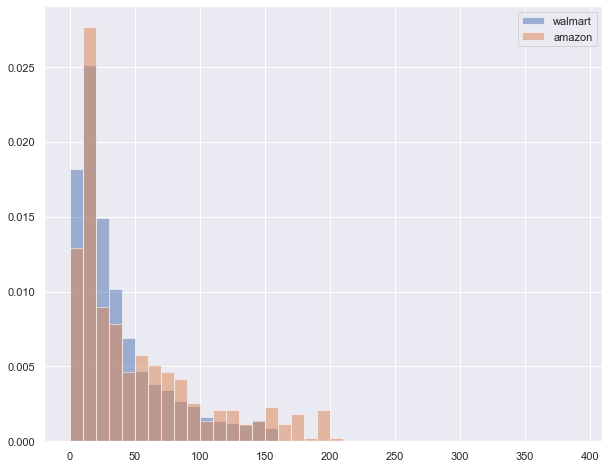

In [49]:
#Distribution of price for Sports-and-Outdoors products

plt.figure(figsize=((10, 8)))
plt.hist(walmart[walmart['Universal Category'] == 'Sports & Outdoors']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Sports & Outdoors']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

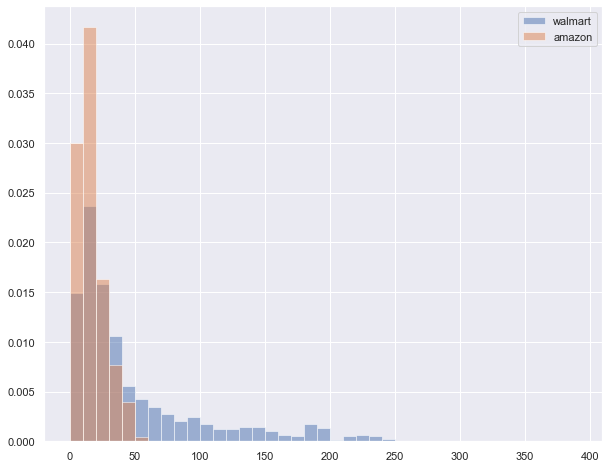

In [50]:
#Distribution of price for Toys products

plt.figure(figsize=((10, 8)))
plt.hist(walmart[walmart['Universal Category'] == 'Toys']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Toys']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

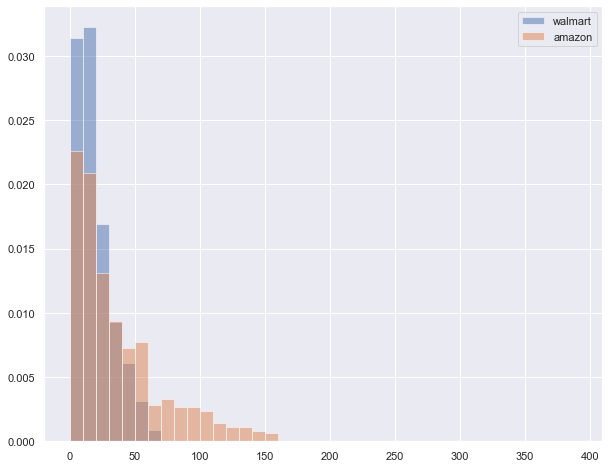

In [51]:
#Distribution of price for Health & Household products

plt.figure(figsize=((10, 8)))
plt.hist(walmart[walmart['Universal Category'] == 'Health & Household']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Health & Household']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

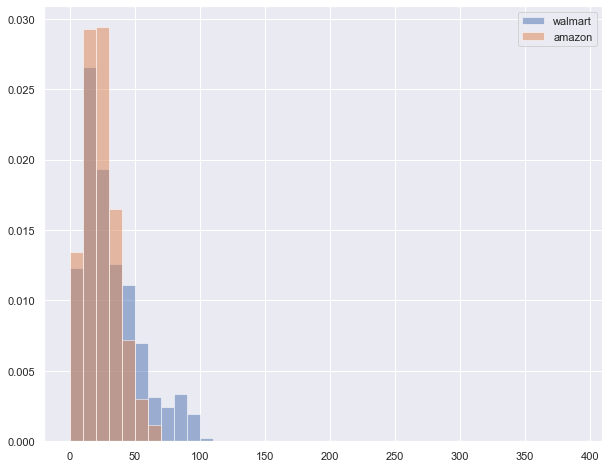

In [52]:
#Distribution of price for Clothing, Shoes & Jewelry products

plt.figure(figsize=((10, 8)))
plt.hist(walmart[walmart['Universal Category'] == 'Clothing, Shoes & Jewelry']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Clothing, Shoes & Jewelry']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

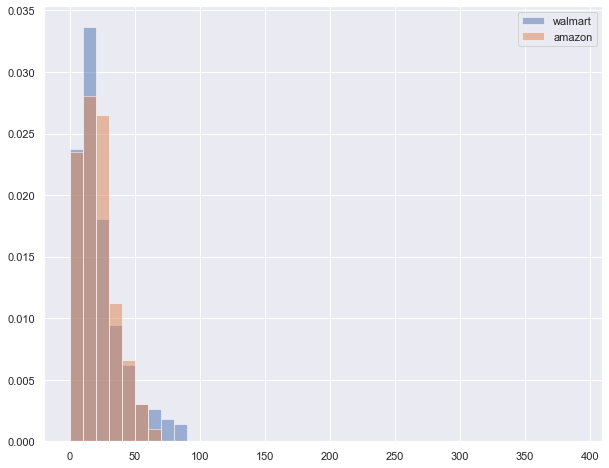

In [53]:
#Distribution of price for Baby products

plt.figure(figsize=((10, 8)))
plt.hist(walmart[walmart['Universal Category'] == 'Baby']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Baby']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

## Analysis

In [54]:
from scipy.stats import ks_2samp

#function that performs a KS test given a category and an alternative
def perform_ks(category, alternative='two_sided'):   
    walmart_prices = walmart[walmart['Universal Category'] == category]['Sale Price']
    amazon_prices = amazon[amazon['Universal Category'] == category]['Selling Price']
    
    #show the median prices and cdfs
    print(f'Median Walmart Price For {category}: {walmart_prices.median()}')
    print(f'Median Amazon Price For {category}: {amazon_prices.median()}')
    print()
    generate_cdf(walmart_prices, amazon_prices)
    
    #execute the test
    res = ks_2samp(walmart_prices, amazon_prices, alternative=alternative)
    
    print(f'Test Stat: {res[0]}')
    print(f'P-value: {res[1]}')
    
    return res

In [55]:
#code to plot the QQplot for a category for each dataset

def plot_qq(category):
    walmart_prices = walmart[walmart['Universal Category'] == category]['Sale Price']
    amazon_prices = amazon[amazon['Universal Category'] == category]['Selling Price']
    
    standardized_wp = (walmart_prices - walmart_prices.mean()) / walmart_prices.std()
    standardized_ap = (amazon_prices - amazon_prices.mean()) / amazon_prices.std()
    
    fig, axs = plt.subplots(2, figsize=(10, 15))
    sm.qqplot(standardized_wp, line='s', ax=axs[0])
    axs[0].set_title(f'Walmart QQPlot for {category}')
    sm.qqplot(standardized_ap, line='s', ax=axs[1])
    axs[1].set_title(f'Amazon QQPlot for {category}')

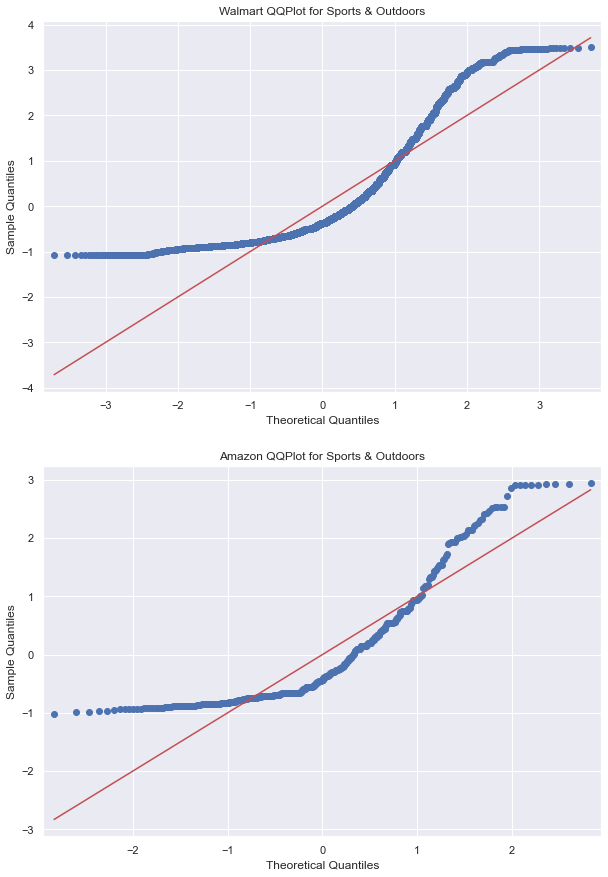

In [56]:
plot_qq(category='Sports & Outdoors')

Median Walmart Price For Sports & Outdoors: 24.95
Median Amazon Price For Sports & Outdoors: 31.060000000000002

Test Stat: 0.14523902173370254
P-value: 2.1982773147657314e-08


C:\Users\User\AppData\Local\Temp\ipykernel_16492\2022560832.py:15: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = ks_2samp(walmart_prices, amazon_prices, alternative=alternative)


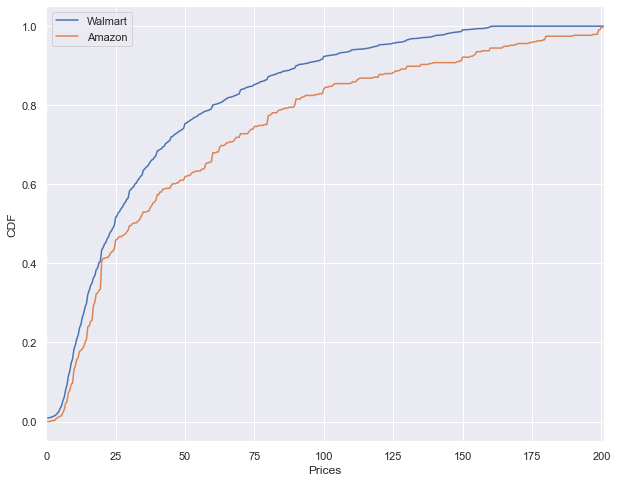

In [57]:
res = perform_ks('Sports & Outdoors', alternative='greater')

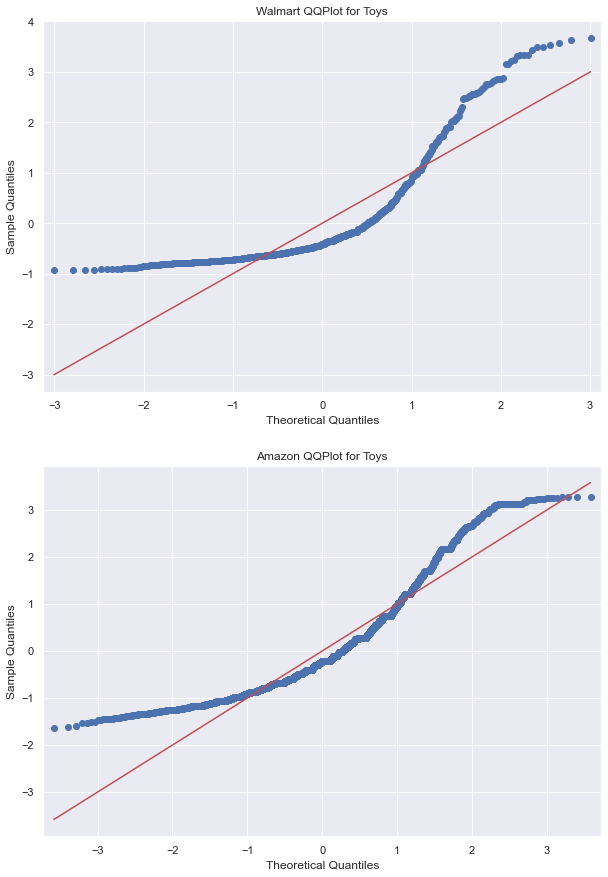

In [58]:
plot_qq('Toys')

Median Walmart Price For Toys: 26.975
Median Amazon Price For Toys: 14.915

Test Stat: 0.3400291835860035
P-value: 9.154684060756554e-68


C:\Users\User\AppData\Local\Temp\ipykernel_16492\2022560832.py:15: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = ks_2samp(walmart_prices, amazon_prices, alternative=alternative)


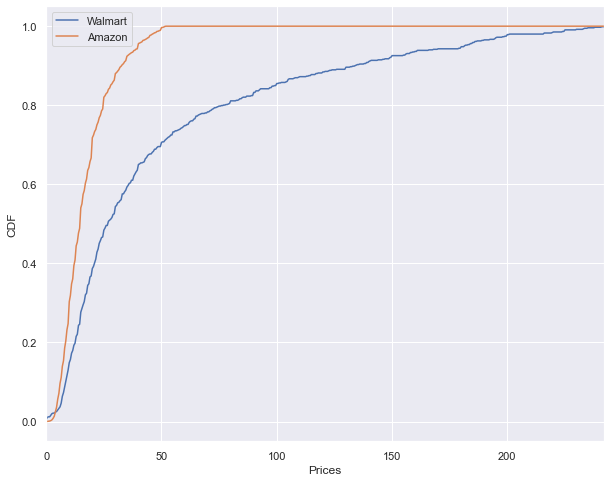

In [59]:
res = perform_ks('Toys', alternative='less')

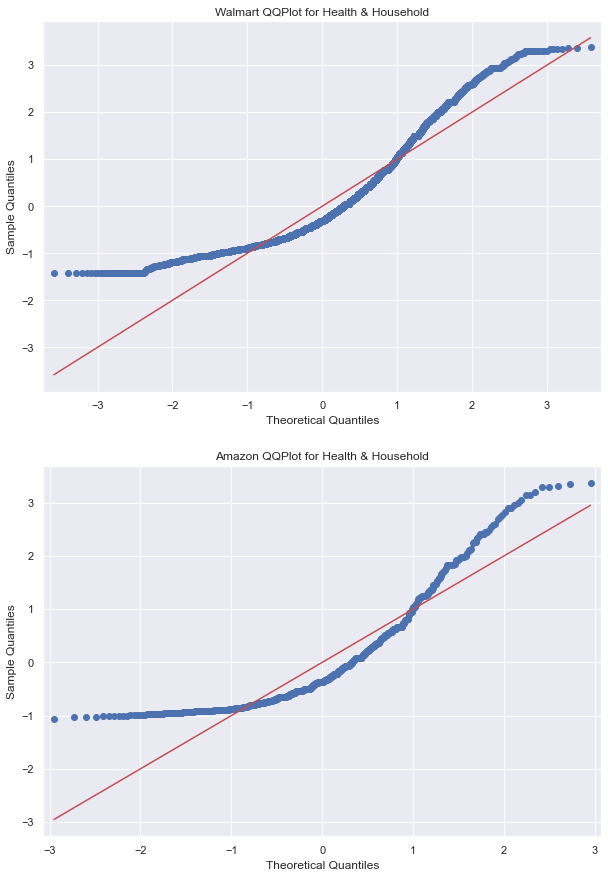

In [60]:
plot_qq("Health & Household")

Median Walmart Price For Health & Household: 14.99
Median Amazon Price For Health & Household: 24.99

Test Stat: 0.25480087500864634
P-value: 5.637507597005265e-33


C:\Users\User\AppData\Local\Temp\ipykernel_16492\2022560832.py:15: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = ks_2samp(walmart_prices, amazon_prices, alternative=alternative)


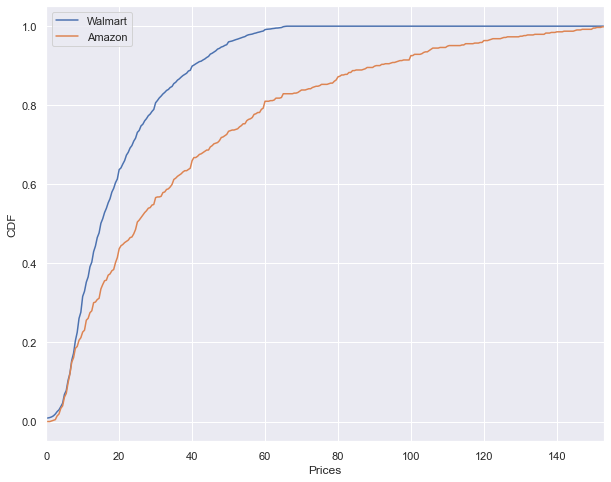

In [61]:
res = perform_ks('Health & Household', alternative='greater')

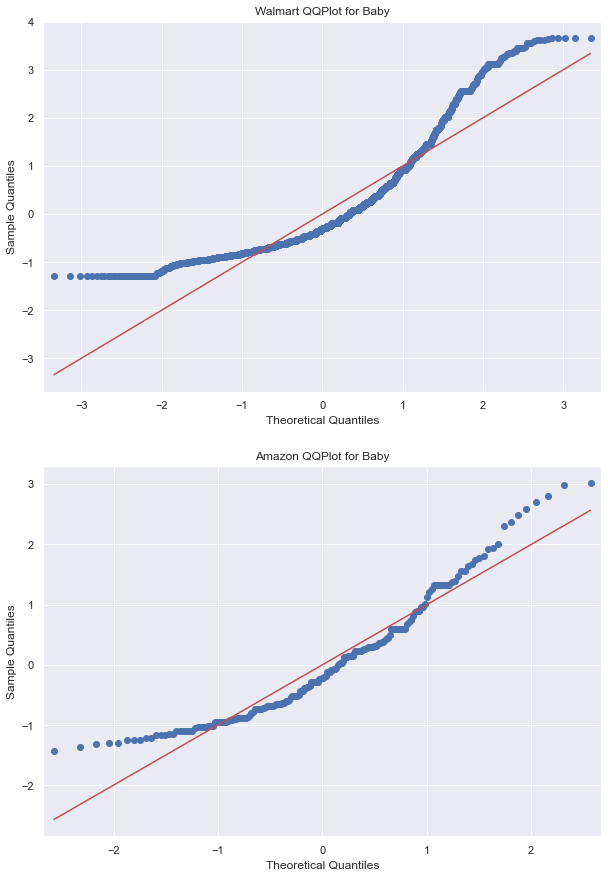

In [62]:
plot_qq('Baby')

Median Walmart Price For Baby: 17.83
Median Amazon Price For Baby: 18.93

Test Stat: 0.06251814533344718
P-value: 0.4586585355963531


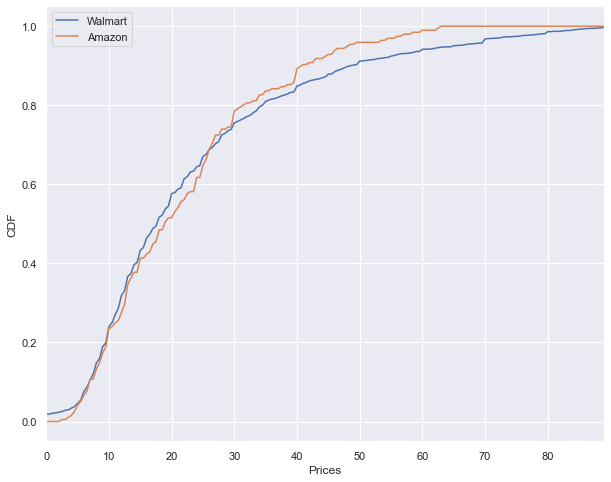

In [63]:
res = perform_ks('Baby', alternative='two-sided')

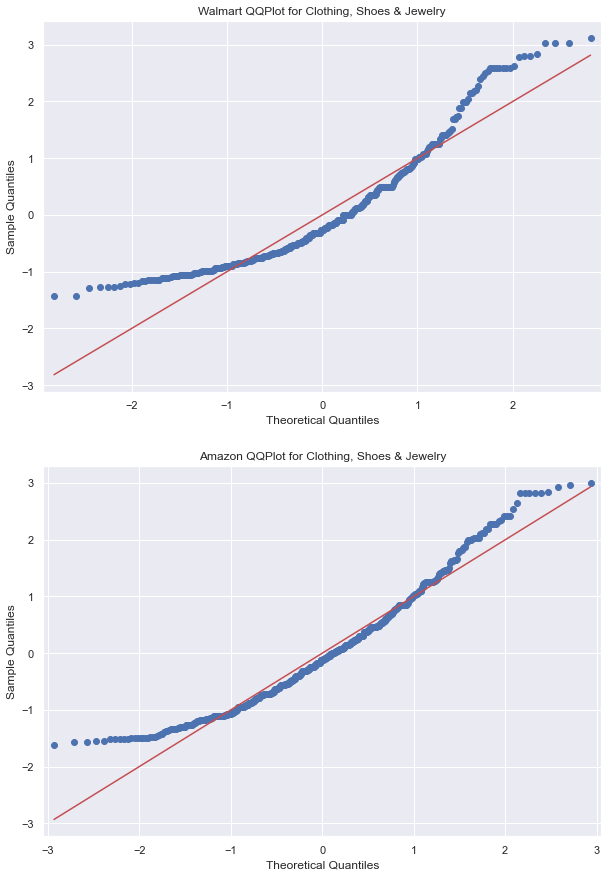

In [64]:
plot_qq('Clothing, Shoes & Jewelry')

Median Walmart Price For Clothing, Shoes & Jewelry: 26.0
Median Amazon Price For Clothing, Shoes & Jewelry: 22.604999999999997

Test Stat: 0.19059391872691106
P-value: 1.5367272659882707e-08


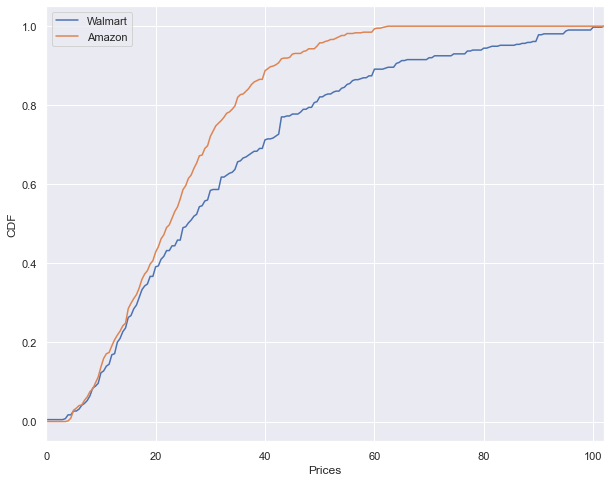

In [65]:
res = perform_ks('Clothing, Shoes & Jewelry', alternative='less')

### Hypothesis tests

We saw in our EDA that both Walmart and Amazon have their own respective item counts per universal category. Here we'll implement a Chi-Squared test of homogeneity evaluate whether or not the proportions of items in each category are identical across stores. We want to test if the observed frequencies of the categories are **consistent** with each other.

In [66]:
walmart['Universal Category'].value_counts()

Universal Category
Sports & Outdoors            9782
Health & Household           5856
Baby                         2390
Toys                          752
Clothing, Shoes & Jewelry     414
Name: count, dtype: int64

In [67]:
amazon['Universal Category'].value_counts()

Universal Category
Toys                         5858
Health & Household            632
Clothing, Shoes & Jewelry     595
Sports & Outdoors             434
Baby                          196
Name: count, dtype: int64

In [68]:
combined_counts = pd.DataFrame({'walmart': walmart['Universal Category'].value_counts().sort_index(), 
                   'amazon': amazon['Universal Category'].value_counts().sort_index()})
contingency_table = combined_counts.T.values

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Squared Statistic: 16749.285450576455
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[1844.57556951  719.71258687 4627.84466164 7287.00078041 4714.86640158]
 [ 741.42443049  289.28741313 1860.15533836 2928.99921959 1895.13359842]]


We can conclude that the observed frequencies are, in fact, not consistent with each other across stores as shown by a p-value less than $\alpha=0.01$

# Regression (separate models)

First, we fit individual models to data from each store, to get a feel for the general relationship between item category and sales price.

In [69]:
# rename columns
amazon_reg = amazon.rename(columns={'Brand Name':'brand', 'Selling Price':'sale_price', 'Primary Category':'primary_category', 'Universal Category':'universal_category'})
walmart_reg = walmart.rename(columns={'Brand':'brand', 'Sale Price':'sale_price', 'Primary Category':'primary_category', 'Universal Category':'universal_category'})

#Swap columns 2 and 3 of amazon to match walmart
cols = amazon_reg.columns.tolist()
cols[1], cols[2] = cols[2], cols[1]
amazon_reg = amazon_reg[cols]

walmart_reg = walmart_reg[walmart_reg['sale_price'] != 0] # get rid of the 0.0 value that was messing up the log response.

In [70]:
response_amazon = 'sale_price'
response_walmart = 'sale_price'
drop_cols_amazon = [response_amazon, 'Product Name', 'primary_category']
drop_cols_walmart = [response_walmart, 'Product Name', 'primary_category']

covariates_amazon = amazon_reg.columns.drop(drop_cols_amazon)
covariates_walmart = walmart_reg.columns.drop(drop_cols_walmart)

#covariates_amazon = 'universal_category'
#covariates_walmart = 'universal_category'

amazon_model_formula = f"{response_amazon} ~ {' + '.join(covariates_amazon)}"   #Can try replacing {response_amazon} np.log({response_amazon/walmart})
amazon_model = smf.ols(amazon_model_formula, amazon_reg).fit()

walmart_model_formula = f"{response_walmart} ~ {' + '.join(covariates_walmart)}"
walmart_model = smf.ols(walmart_model_formula, walmart_reg).fit()

amazon_model_table = amazon_model.summary()
walmart_model_table = walmart_model.summary()
print(amazon_model_table)
print(walmart_model_table)

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     514.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:32:45   Log-Likelihood:                -33419.
No. Observations:                7715   AIC:                         6.685e+04
Df Residuals:                    7710   BIC:                         6.688e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [71]:
def classify_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
    return numerical_cols, categorical_cols

amazon_numerical_cols, amazon_categorical_cols = classify_columns(df=amazon_reg)
walmart_numerical_cols, walmart_categorical_cols = classify_columns(df=walmart_reg)

print("Amazon numerical columns:", amazon_numerical_cols)
print("Amazon categorical columns:", amazon_categorical_cols)
print("Walmart numerical columns:", walmart_numerical_cols)
print("Walmart categorical columns:", walmart_categorical_cols)

Amazon numerical columns: ['sale_price']
Amazon categorical columns: ['Product Name', 'primary_category', 'universal_category']
Walmart numerical columns: ['sale_price']
Walmart categorical columns: ['Product Name', 'primary_category', 'universal_category']


Columns are appropriately categorized already (Brand for amazon is NaN so we can't use it)

### Checking the assumptions

In [72]:
residuals_walmart = walmart_model.resid
residuals_amazon = amazon_model.resid

def standardize(X):
    return (X - X.mean()) / X.std()

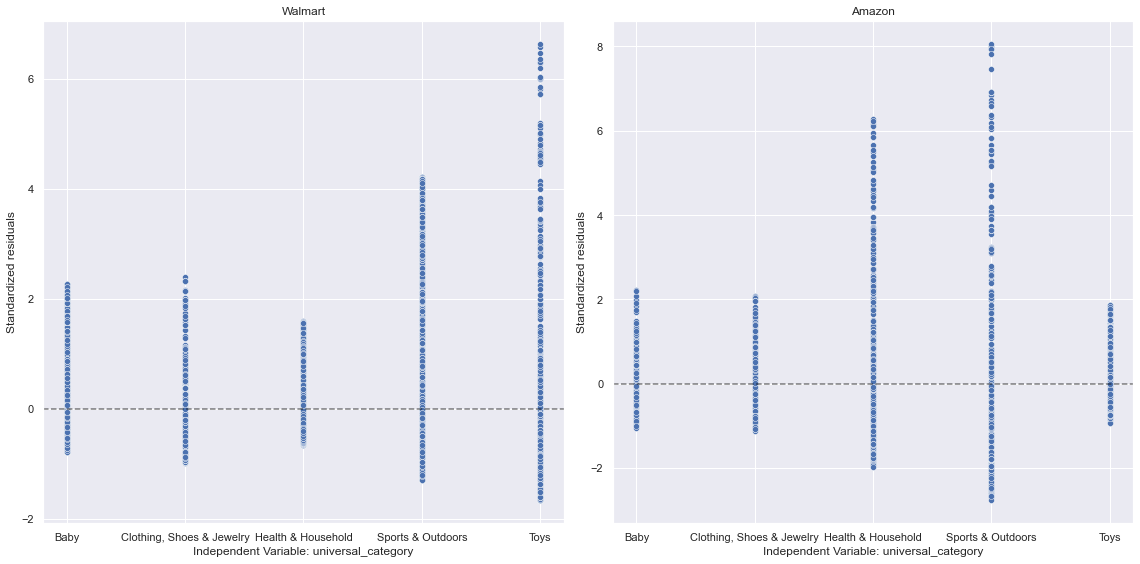

In [73]:
fig, axs = plt.subplots(len(covariates_walmart), 2, figsize=(16, 8))

#keeping this in the for loop even though we only have one covariate so far, in case we want to try adding brand covariate for walmart, although i don't think it will work (too many brands)
#for i, covariate_walmart in enumerate(covariates_walmart):
#    sns.scatterplot(x=df[covariate_walmart], y=standardize(residuals_walmart), ax=axs[i, 0])
#    axs[i, 0].xaxis.set_label_text(f'Independent Variable: {covariates_walmart}')
#    axs[i, 0].yaxis.set_label_text('Standardized residuals')
#    axs[i, 0].axhline(0, color='black', linestyle='--', alpha=0.5)
#    axs[i, 0].set_title(f'Data {covariate_walmart}')

sns.scatterplot(x=walmart_reg[covariates_walmart[0]], y=standardize(residuals_walmart), ax=axs[0])
axs[0].xaxis.set_label_text(f'Independent Variable: {covariates_walmart[0]}')
axs[0].yaxis.set_label_text('Standardized residuals')
axs[0].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[0].set_title('Walmart')

sns.scatterplot(x=amazon_reg[covariates_amazon[0]], y=standardize(residuals_amazon), ax=axs[1])
axs[1].xaxis.set_label_text(f'Independent Variable: {covariates_amazon[0]}')
axs[1].yaxis.set_label_text('Standardized residuals')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_title('Amazon')
plt.tight_layout()

**Linearity**: The relationship between the independent variables and the response appears somewhat linear but not completely, since the residuals are mostly clustered around the line $y = 0$ as the independent variable changes, but there is some bias in the residuals where the positive residuals tend to be further from $y=0$ than the negative residuals. Based off of the plots above, it is difficult to say if this should satisfy the linearity assumption, but I think it can pass the linearity assumption.

Text(0.5, 1.0, 'Amazon')

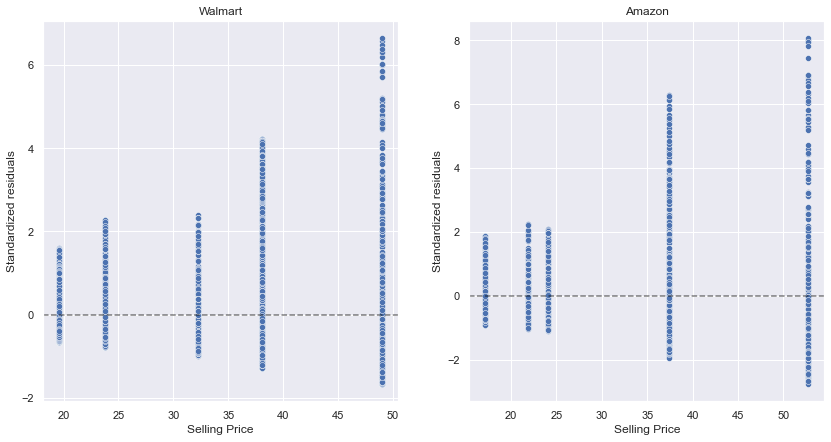

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(x=walmart_model.fittedvalues, y=standardize(residuals_walmart), ax=axs[0])
axs[0].xaxis.set_label_text('Selling Price')
axs[0].yaxis.set_label_text('Standardized residuals')
axs[0].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[0].set_title('Walmart')

sns.scatterplot(x=amazon_model.fittedvalues, y=standardize(residuals_amazon), ax=axs[1])
axs[1].xaxis.set_label_text('Selling Price')
axs[1].yaxis.set_label_text('Standardized residuals')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_title('Amazon')

**Identical errors / homoscedasticity:** The plot of the residuals against the response variable $y$ shows a pretty random pattern clustered around $y=0$, but there is some bias in the residuals where the positive residuals tend to be further from $y=0$ than the negative residuals. There is also some degree of visible fanning out as price increases. Overall, these are look like potentially significant enough effects to violate the identical errors assumption.

In the plot of the residuals against the independent variable "Universal Category", there is potential heteroscedasticity in both datasets since in the "Sports $\&$ Outdoors" and "Toys" categories of the walmart dataset, there is some visual indication of increased variance. The same is true in the "Health $\&$ Household" and "Sports $\&$ Outdoors" categories of the amazon dataset. This might also violate the identical errors assumption.

- $\text{Var}(\epsilon_i) = \sigma^2 \quad \forall i$.

Text(0.5, 1.0, 'Amazon')

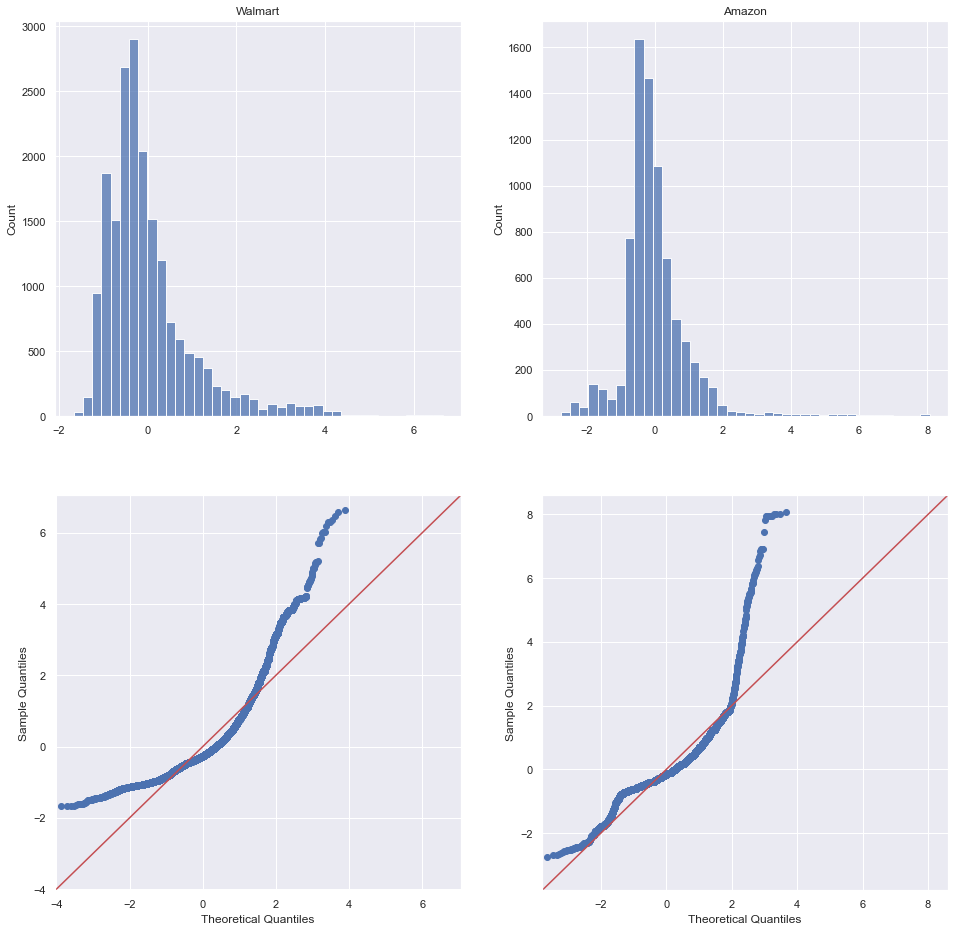

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(standardize(residuals_walmart), bins=40, ax=axs[0, 0])
sm.qqplot(standardize(residuals_walmart), line='45', ax=axs[1, 0])
axs[0, 0].set_title('Walmart')

sns.histplot(standardize(residuals_amazon), bins=40, ax=axs[0, 1])
sm.qqplot(standardize(residuals_amazon), line='45', ax=axs[1, 1])
axs[0, 1].set_title('Amazon')

In [76]:
shapiro_walmart = stats.shapiro(standardize(residuals_walmart))
shapiro_amazon = stats.shapiro(standardize(residuals_amazon))
print(f'Walmart normality p-value:{shapiro_walmart.pvalue}')
print(f'Amazon normality p-value:{shapiro_amazon.pvalue}')

Walmart normality p-value:0.0
Amazon normality p-value:0.0


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Normality**: Visually, it it does not look like the normality assumption is met. Using the Shapiro-Wilk test to obtain a more quantitative result to base a decision off of, we get an extremely low p-value for both datasets ($\approx 1.07 \times 10^{-86}$ for walmart, and $\approx 1.07 \times 10^{-69}$ for amazon) that would satisfy being below any reasonable value of $\alpha$ for which we would base the hypothesis test. 

$$
\color{red}{\text{Will try np.log(response) in a separate regression model below.}}
$$

Text(0.5, 1.0, 'Amazon')

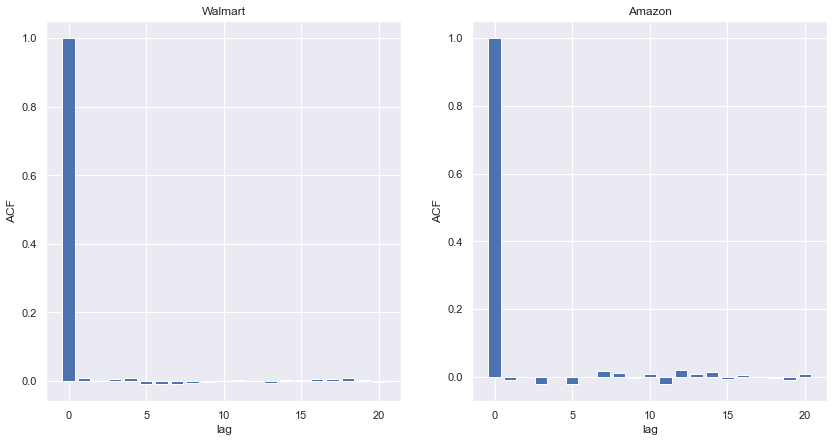

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
lags = 20

axs[0].bar(range(lags+1), acf(residuals_walmart, nlags=lags))
axs[0].set_xlabel('lag'); axs[0].set_ylabel('ACF'); axs[0].set_title('Walmart')

axs[1].bar(range(lags+1), acf(residuals_amazon, nlags=lags))
axs[1].set_xlabel('lag'); axs[1].set_ylabel('ACF'); axs[1].set_title('Amazon')

**Independence:** The ACF is is very close to $0$ even at one lag, indicating that the independence of the residuals assumption is satisfied for both datasets.
 
- $\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad$ are dependent, because $y_{i+k}$ with lag $k$ is not influenced by the value of $y_i, \forall k \leq 20$.

**Completeness:** There is no way to test this, but item category is a main determinant of price, so a lot what should affect price should be included in the model.

### Trying regression with log response

In [78]:
amazon_log_model_formula = f"np.log({response_amazon}) ~ {' + '.join(covariates_amazon)}"   #Can try replacing {response_amazon} np.log({response_amazon/walmart})
amazon_log_model = smf.ols(amazon_log_model_formula, amazon_reg).fit()

walmart_log_model_formula = f"np.log({response_walmart}) ~ {' + '.join(covariates_walmart)}"
walmart_log_model = smf.ols(walmart_log_model_formula, walmart_reg).fit()

amazon_log_model_table = amazon_log_model.summary()
walmart_log_model_table = walmart_log_model.summary()
print(amazon_log_model_table)
print(walmart_log_model_table)

                            OLS Regression Results                            
Dep. Variable:     np.log(sale_price)   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          7.43e-193
Time:                        20:32:46   Log-Likelihood:                -8116.2
No. Observations:                7715   AIC:                         1.624e+04
Df Residuals:                    7710   BIC:                         1.628e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [79]:
residuals_log_walmart = walmart_log_model.resid
residuals_log_amazon = amazon_log_model.resid

Text(0.5, 1.0, 'Amazon with log response')

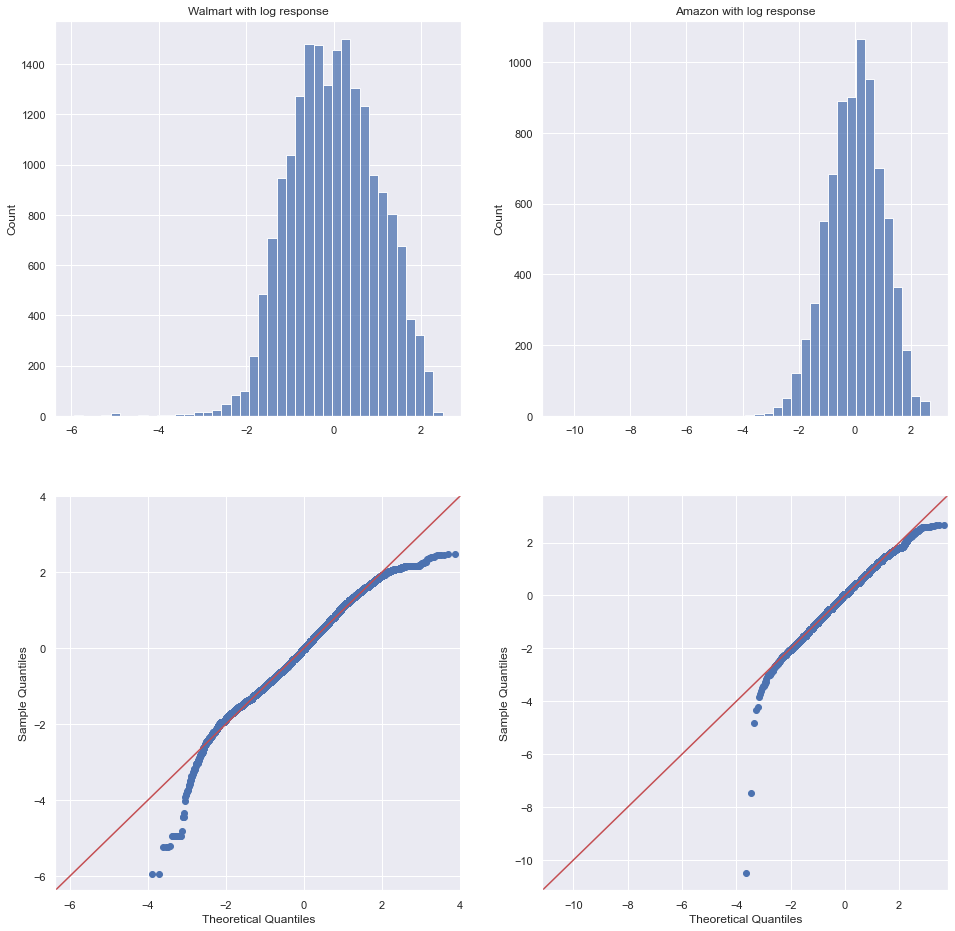

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(standardize(residuals_log_walmart), bins=40, ax=axs[0, 0])
sm.qqplot(standardize(residuals_log_walmart), line='45', ax=axs[1, 0])
axs[0, 0].set_title('Walmart with log response')

sns.histplot(standardize(residuals_log_amazon), bins=40, ax=axs[0, 1])
sm.qqplot(standardize(residuals_log_amazon), line='45', ax=axs[1, 1])
axs[0, 1].set_title('Amazon with log response')

In [81]:
shapiro_log_walmart = stats.shapiro(standardize(residuals_log_walmart))
shapiro_log_amazon = stats.shapiro(standardize(residuals_log_amazon))
print(f'Walmart normality p-value:{shapiro_log_walmart.pvalue}')
print(f'Amazon normality p-value:{shapiro_log_amazon.pvalue}')

Walmart normality p-value:1.590277083401532e-33
Amazon normality p-value:1.761033954938435e-24


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Normality**: Visually, it looks like the normality assumption when the response variable is the log of the sale price is met a lot better than the model without the log response. Using the Shapiro-Wilk test to obtain a more quantitative result to base a decision off of, we get an extremely low p-value for both datasets ($\approx 1.64 \times 10^{-33}$ for walmart, and $\approx 1.75 \times 10^{-24}$ for amazon) that would satisfy being below any reasonable value of $\alpha$ for which we would base the hypothesis test. 

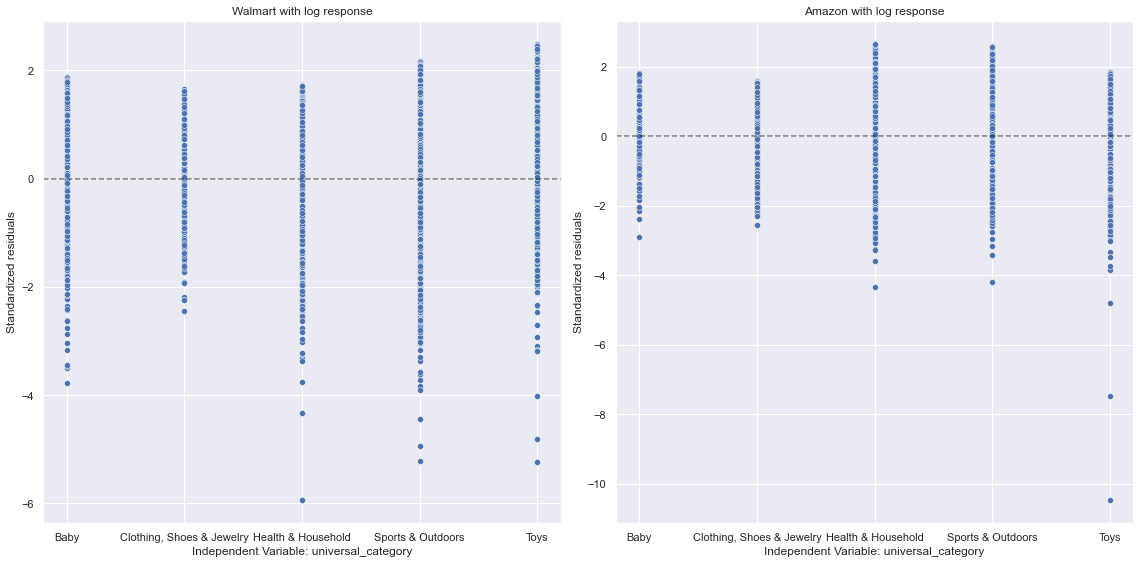

In [82]:
fig, axs = plt.subplots(len(covariates_walmart), 2, figsize=(16, 8))

sns.scatterplot(x=walmart_reg[covariates_walmart[0]], y=standardize(residuals_log_walmart), ax=axs[0])
axs[0].xaxis.set_label_text(f'Independent Variable: {covariates_walmart[0]}')
axs[0].yaxis.set_label_text('Standardized residuals')
axs[0].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[0].set_title('Walmart with log response')

sns.scatterplot(x=amazon_reg[covariates_amazon[0]], y=standardize(residuals_log_amazon), ax=axs[1])
axs[1].xaxis.set_label_text(f'Independent Variable: {covariates_amazon[0]}')
axs[1].yaxis.set_label_text('Standardized residuals')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_title('Amazon with log response')
plt.tight_layout()

**Linearity**: The relationship between the independent variables and the response appears linear, since the residuals are mostly clustered around the line $y = 0$ as the independent variable changes. Based off of the plots above, the linearity assumption should be satisfied for both datasets.

Text(0.5, 1.0, 'Amazon with log response')

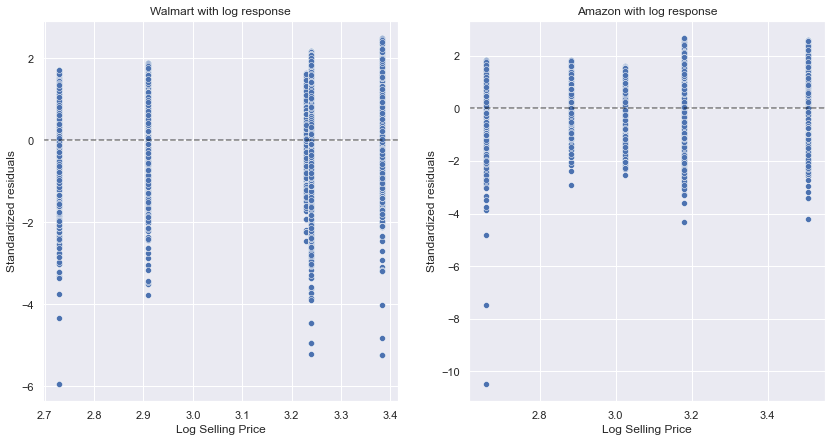

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(x=walmart_log_model.fittedvalues, y=standardize(residuals_log_walmart), ax=axs[0])
axs[0].xaxis.set_label_text('Log Selling Price')
axs[0].yaxis.set_label_text('Standardized residuals')
axs[0].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[0].set_title('Walmart with log response')

sns.scatterplot(x=amazon_log_model.fittedvalues, y=standardize(residuals_log_amazon), ax=axs[1])
axs[1].xaxis.set_label_text('Log Selling Price')
axs[1].yaxis.set_label_text('Standardized residuals')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_title('Amazon with log response')

**Identical errors / homoscedasticity:** The plot of the residuals against the response variable $y$ shows a pretty randomly clustered points around $y=0$ for both datasets.

The plot of the residuals against the independent variable "Universal Category" also shows a pretty randomly clustered points around $y=0$ for both datasets.

In total, the identical errors assumption should be satisfied for both datasets.

- $\text{Var}(\epsilon_i) = \sigma^2 \quad \forall i$.

Text(0.5, 1.0, 'Amazon with log response')

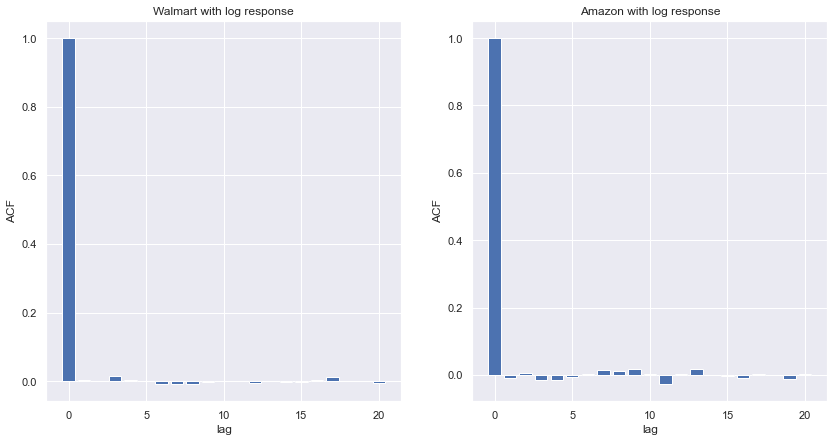

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
lags = 20

axs[0].bar(range(lags+1), acf(residuals_log_walmart, nlags=lags))
axs[0].set_xlabel('lag'); axs[0].set_ylabel('ACF'); axs[0].set_title('Walmart with log response')

axs[1].bar(range(lags+1), acf(residuals_log_amazon, nlags=lags))
axs[1].set_xlabel('lag'); axs[1].set_ylabel('ACF'); axs[1].set_title('Amazon with log response')

**Independence:** The ACF is is very close to $0$ even at one lag, indicating that the independence of the residuals assumption is satisfied for both datasets.
 
- $\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad$ are dependent, because $y_{i+k}$ with lag $k$ is not influenced by the value of $y_i, \forall k \leq 20$.


**Completeness:** There is no way to test this, but item category is a main determinant of price, so a lot what should affect price should be included in the model.

# Regression (combined model)

Now, we combine the data from both stores and use the store as a covariate in our ultimate model.

In [85]:
# change column names
amazon_reg = amazon.rename(columns={'Brand Name':'brand', 'Selling Price':'sale_price', 'Primary Category':'primary_category', 'Universal Category':'universal_category'})
walmart_reg = walmart.rename(columns={'Brand':'brand', 'Sale Price':'sale_price', 'Primary Category':'primary_category', 'Universal Category':'universal_category'})

# combine data frames and label by store
amazon_reg['store'] = 'amazon'
walmart_reg['store'] = 'walmart'

walmart_reg = walmart_reg[walmart_reg['sale_price'] != 0] # get rid of the 0.0 value that was messing up the log response.

df = pd.concat([amazon_reg, walmart_reg])[['sale_price', 'primary_category', 'universal_category', 'store']]

In [86]:
df['store'].value_counts()

store
walmart    19018
amazon      7715
Name: count, dtype: int64

In [87]:
response = 'sale_price'
model_formula = f"{response} ~ {' + '.join(['store', 'universal_category'])}"
model = smf.ols(model_formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     504.7
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:32:47   Log-Likelihood:            -1.2622e+05
No. Observations:               26733   AIC:                         2.524e+05
Df Residuals:                   26727   BIC:                         2.525e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          20.4275      0.771     26.495      0.000      18.916      21.939
store[T.walmart]                                    3.4863      0.597      5.839      0.000       2.316       4.657
universal_category[T.Clothing, Shoes & Jewelry]     5.5549      1.058      5.252      0.000       3.482       7.628
universal_category[T.Health & Household]           -2.2162      0.637     -3.479      0.001      -3.465      -0.968
universal_category[T.Sports & Outdoors]            14.9498      0.603     24.775      0.000      13.767      16.133
universal_category[T.Toys]                         -0.0429      0.798     -0.054      0.957      -1.607       1.521
==============================================================================
Omnibus:                    13248.231   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91010.759
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                      10.766   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation of the coefficients

---
We see that all coefficients are significant at the $\alpha=0.05$ level aside from the Toys category. The reference category used in the case of the store and universal_category covariates is 'amazon' and 'baby'.

- store[T.walmart]: **Holding all else constant, a change from the reference category, 'amazon', to 'walmart' is predicted to increase the sales price by 3.2792 dollars**
- universal_category[T.Clothing, Shoes & Jewelry]: Holding all else constant, a change from the reference category, 'baby', to 'clothing, shoes & jewelry' is predicted to increase the sales price by 5.8062 dollars
- universal_category[T.Health & Household]: Holding all else constant, a change from the reference category, 'baby', to 'health & household' is predicted to decrease the sales price by 1.9718 dollars
- universal_category[T.Sports & Outdoors]: Holding all else constant, a change from the reference category, 'baby', to 'sports & outdoors' is predicted to increase the sales price by 0.1908 dollars

Let's perform an ANOVA test to see whether or not the inclusion of the 'store' variable signficantly improve the predictions output by this regression model.

In [88]:
small_formula = f"{response} ~ universal_category"
big_formula = f"{response} ~ {' + '.join(['store', 'universal_category'])}"

In [89]:
small_model = smf.ols(small_formula, data=df).fit()
big_model = smf.ols(big_formula, data=df).fit()

anova_table = sm.stats.anova_lm(small_model, big_model)
print(anova_table)

   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0   26728.0  1.977595e+07      0.0           NaN        NaN           NaN
1   26727.0  1.975076e+07      1.0  25196.499173  34.096253  5.305860e-09


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\anova.py:374: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table[pr_test][table['F'].isnull()] = np.nan


In [90]:
anova_table['Pr(>F)'].values[1]

5.305860077236459e-09

Based on the fact that this p-value is less than $\alpha = 0.01$, we can conclude that the covariate 'store' in the big model significantly improves the model fit compared to just the small model ('universal category' alone). This suggests that the two stores 'Amazon' and 'Walmart' do in fact demonstrate differences pricing, implying one may be favorable to shop at over the other for certain categories of items.

### Checking the assumptions

In [91]:
residuals = model.resid

def standardize(X):
    return (X - X.mean()) / X.std()

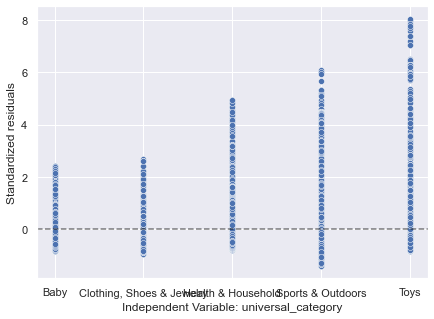

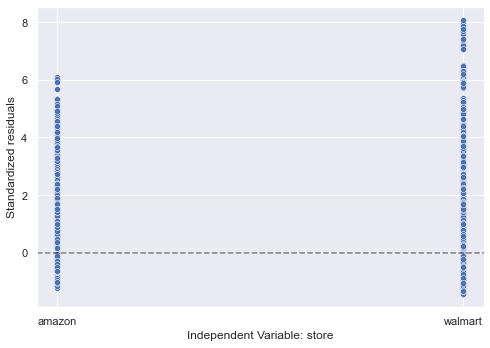

In [92]:

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['universal_category'], y=standardize(residuals))
plt.xlabel(f'Independent Variable: universal_category')
plt.ylabel('Standardized residuals')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['store'], y=standardize(residuals))
plt.xlabel(f'Independent Variable: store')
plt.ylabel('Standardized residuals')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()

**Linearity**: The relationship between the independent variables and the response appears somewhat linear but not completely, since the residuals are mostly clustered around the line $y = 0$ as the independent variable changes, but there is some bias in the residuals where the positive residuals tend to be further from $y=0$ than the negative residuals. Based off of the plots above, it is difficult to say if this should satisfy the linearity assumption, but I think it can pass the linearity assumption.

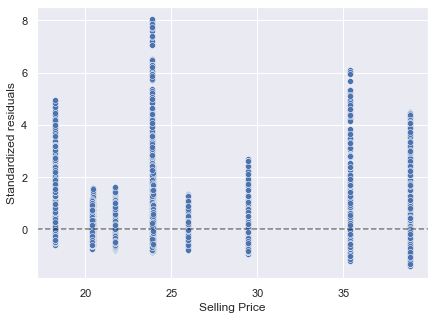

In [93]:
plt.figure(figsize=(7,5))

sns.scatterplot(x=model.fittedvalues, y=standardize(residuals))
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Selling Price')
plt.ylabel('Standardized residuals');

**Identical errors / homoscedasticity:** The plot of the residuals against the response variable $y$ shows a pretty random pattern clustered around $y=0$, but there is some bias in the residuals where the positive residuals tend to be further from $y=0$ than the negative residuals. There is also some degree of visible fanning out as price increases. Overall, these are look like potentially significant enough effects to violate the identical errors assumption.

In the plot of the residuals against the independent variable "Universal Category", there is potential heteroscedasticity in both datasets since in the "Sports $\&$ Outdoors" and "Toys" categories of the walmart dataset, there is some visual indication of increased variance. The same is true in the "Health $\&$ Household" and "Sports $\&$ Outdoors" categories of the amazon dataset. This might also violate the identical errors assumption.

- $\text{Var}(\epsilon_i) = \sigma^2 \quad \forall i$.

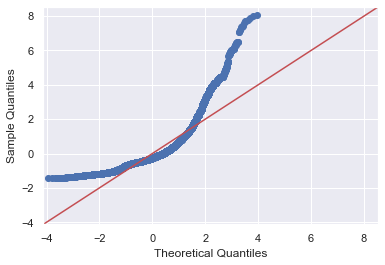

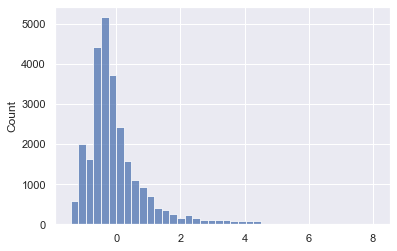

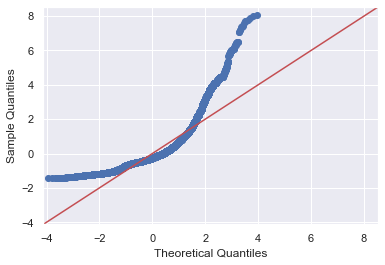

In [94]:
sns.histplot(standardize(residuals), bins=40)
sm.qqplot(standardize(residuals), line='45')

In [95]:
shapiro = stats.shapiro(standardize(residuals))
print(f'Normality p-value:{shapiro.pvalue}')

Normality p-value:0.0


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Normality**: Visually, it it does not look like the normality assumption is met. Using the Shapiro-Wilk test to obtain a more quantitative result to base a decision off of, we get an extremely low p-value of $6.77 \times 10^{-100}$ that would satisfy being below any reasonable value of $\alpha$ for which we would base the hypothesis test. 

$$
\color{red}{\text{Will try np.log(response) in a separate regression model below.}}
$$

Text(0, 0.5, 'ACF')

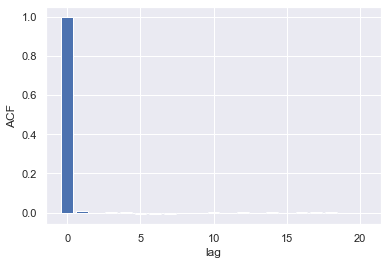

In [96]:
lags = 20

plt.bar(range(lags+1), acf(residuals, nlags=lags))
plt.xlabel('lag'); plt.ylabel('ACF')

**Independence:** The ACF is is very close to $0$ even at one lag, indicating that the independence of the residuals assumption is satisfied.
 
- $\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad$ are dependent, because $y_{i+k}$ with lag $k$ is not influenced by the value of $y_i, \forall k \leq 20$.


**Completeness:** There is no way to test this, but item category and store are main determinants of price, so a lot what should affect price should be included in the model.

### Trying regression with log response

In [97]:
walmart_reg = walmart_reg[walmart_reg['sale_price'] != 0]

model_log_formula = f"np.log({response}) ~ {' + '.join(['store', 'universal_category'])}"
log_model = smf.ols(model_log_formula, df).fit()

log_model_table = log_model.summary()
print(log_model_table)

                            OLS Regression Results                            
Dep. Variable:     np.log(sale_price)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     432.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:32:48   Log-Likelihood:                -32515.
No. Observations:               26733   AIC:                         6.504e+04
Df Residuals:                   26727   BIC:                         6.509e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [98]:
log_residuals = log_model.resid

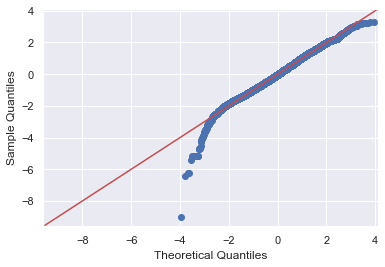

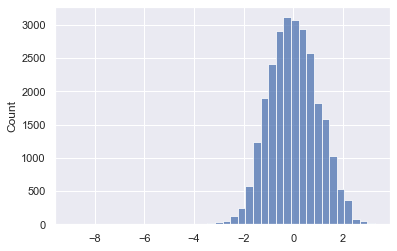

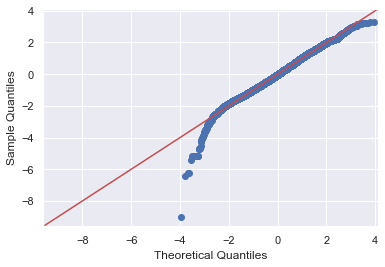

In [99]:
sns.histplot(standardize(log_residuals), bins=40)
sm.qqplot(standardize(log_residuals), line='45')

In [100]:
shapiro_log = stats.shapiro(standardize(log_residuals))
print(f'Normality p-value:{shapiro_log.pvalue}')

Normality p-value:1.9863262798951966e-30


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Normality**: Visually, it looks like the normality assumption when the response variable is the log of the sale price is met a lot better than the model without the log response. Using the Shapiro-Wilk test to obtain a more quantitative result to base a decision off of, we get an extremely low p-value of $1.97 \times 10^{-30}$ that would satisfy being below any reasonable value of $\alpha$ for which we would base the hypothesis test.

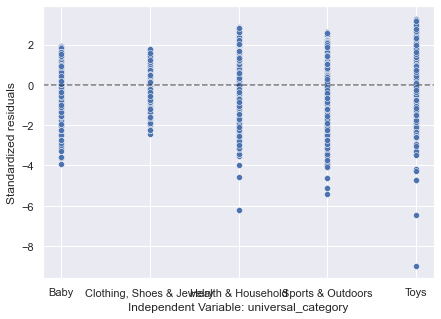

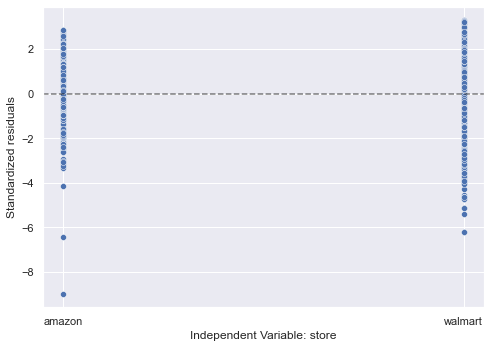

In [101]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['universal_category'], y=standardize(log_residuals))
plt.xlabel(f'Independent Variable: universal_category')
plt.ylabel('Standardized residuals')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['store'], y=standardize(log_residuals))
plt.xlabel(f'Independent Variable: store')
plt.ylabel('Standardized residuals')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()

**Linearity**: The relationship between the independent variables and the response appears linear, since the residuals are mostly clustered around the line $y = 0$ as the independent variable changes. Based off of the plots above, the linearity assumptionshould be satisfied.

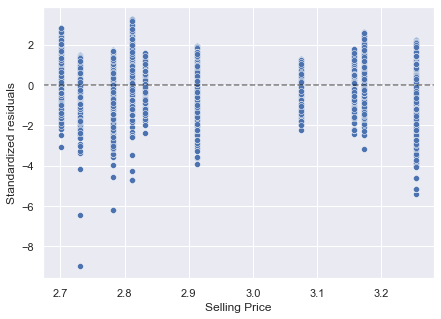

In [102]:
plt.figure(figsize=(7,5))

sns.scatterplot(x=log_model.fittedvalues, y=standardize(log_residuals))
plt.xlabel('Selling Price')
plt.ylabel('Standardized residuals');
plt.axhline(0, color='black', linestyle='--', alpha=0.5)

**Identical errors / homoscedasticity:** The plot of the residuals against the response variable $y$ shows a pretty randomly clustered points around $y=0$.

The plot of the residuals against the independent variable "Universal Category" also shows a pretty randomly clustered points around $y=0$.

In total, the identical errors assumption should be satisfied.

- $\text{Var}(\epsilon_i) = \sigma^2 \quad \forall i$.

Text(0, 0.5, 'ACF')

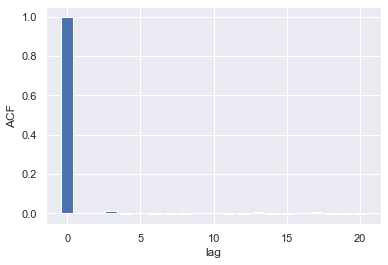

In [103]:
lags = 20

plt.bar(range(lags+1), acf(log_residuals, nlags=lags))
plt.xlabel('lag'); plt.ylabel('ACF')

**Independence:** The ACF is is very close to $0$ even at one lag, indicating that the independence of the residuals assumption is satisfied.
 
- $\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad$ are dependent, because $y_{i+k}$ with lag $k$ is not influenced by the value of $y_i, \forall k \leq 20$.


**Completeness:** There is no way to test this, but item category and store are main determinants of price, so a lot what should affect price should be included in the model.